# COGS 108 Final Project - Wonderful Wine

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Since the majority of our group is not at the legal drinking age yet but are just a year or two away, we were interested in the type of wines that we should try or get into, cheap or expensive, once we turn 21. Also, a group member had someone in their family that works for one of the largest wine manufacturers in the country and we noticed that the higher priced wines were shelved on the top, while lower priced wines were shelved on the bottom. This led to the goal of our project, to find out whether a high-priced wine tastes better than a low-priced wine. Through our analysis we saw that there was a positive correlation between the score that a wine was given and its price.

# Names

- Aditya Mehta
- Sumanth Billa
- Yukti Vijay
- Chinmay Joshi

# Group Members IDs

- A16062688
- A14988215
- A16119609
- A12732969

# Research Question

Is there a correlation between the price of wine and its corresponding WineEnthusiast score?

## Background and Prior Work

   One of our family members works for one of the largest wine manufacturers in the US, and we’ve all noticed over that there are different shelves at stores with stark differences in price. The higher shelves generally had the most expensive and “high quality wines” while the lower shelves included the cheaper and “lower quality wines”. Not being wine enthusiasts ourselves, we thought about why the price for some of the top shelf wines was much higher than the ones on the bottom shelves. Then we asked the question: does the higher priced wine actually tastes better than the cheaper wine?
	
   While doing our background research we found a few articles and studies that have explored the question we posed. In a study done by the American Association of Wine Enthusiasts, the researchers posed the question “Does More Expensive Wine Taste Better?” and used a series of blind tastings to collect their observations. Using a sample pool of more than 6000 blind taste tests, they found that the correlation between price and overall rating is small and negative, which suggested that the individuals enjoyed the more expensive wines slightly less. Their results in the study indicated that the prices of wines and recommendations of wines by experts may not be a good guide for non-expert wine consumers.[1] Another study we looked at was a study done by a Caltech professor in which he had volunteers sampled several different wines that were labeled with increasing prices. However, the prices were labeled inaccurately and the taster’s brain was observed using an MRI. When tasting the same wine twice but with different price tags, the portion of the brain that encodes the experienced pleasantness of an experience reflected an increase in activity when tasting the wine with the higher price tag. This study goes to show that the perception of a wine’s quality affects the way in which the brain processes the experience of the tasting.[2]

References (include links):
- 1) https://moneydotcomvip.files.wordpress.com/2015/05/aawe_wp16.pdf
- 2) https://www.caltech.edu/about/news/wine-study-shows-price-influences-perception-1374

# Hypothesis


We believe a more expensive wine does not always correlate to a high WineEnthusiast score. For example, an eighteen thousand dollar bottle of wine from a well-known winery may have a lower score than a twenty dollar bottle of wine from Vons.

# Dataset(s)

*The dataset we obtained is from WineMag, known as Wine Enthusiast Magazine. This dataset is split up into two portions as the datasets are quite large. The first dataset contains around the first 150,000 wine reviews, while the second dataset contains the next 130,000 (approximately).*

- Dataset Name: winemag-data_first150k.csv
- Link to the dataset: https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data_first150k.csv?token=AL3E7GXSTCCMXRTCQXTHUFS6PORBM
- Number of observations: 150930 observations


- Dataset Name: winemag-data-130k-v2.csv
- Link to the dataset: https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data-130k-v2.csv?token=AL3E7GQN6ESJMRSSGLS7UJK6PORDO
- Number of observations: 129971 observations

Each of these datasets contains the reviews made by people who sampled a bottle of wine and gave it a score out of 100. The dataset contains the following elements:

| Column name | Column description|
|------|------|
|   country  | The country that the wine was made in.|
|description| A description of the flavor and aromas of the wine.|
|designation| The name of that particular wine bottle (given by winery).|
|points| The score given to this wine by the reviewer.|
|price| The price per bottle of the sampled wine.|
|province|The province of a country that the wine was made in.|
|region_1| The region within the province that the wine was made in.|
|region_2| Another designation for the region of manufacturing.|
|taster_name|The name of the person generating the review.|
|taster_twitter_handle|The twitter handle of the person tasting and reviewing (if applicable).|
|title|The official name of the wine including its manufacturing year.|
|variety|The catagory of specialty wine that the wine falls under.|
|winery|The name of the winery that manufactured this wine.|


# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import random
import matplotlib.pyplot as plt
%matplotlib inline


# Data Cleaning

### Load the data

Load the data from the given URLs and assign the datasets to DataFrames using Pandas.

In [2]:
url_1 = 'https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data_first150k.csv?token=AHA76QCMQ2OF2JCGRQS7KQK6PTHFG'
url_2 = 'https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data-130k-v2.csv?token=AHA76QDNUZTZB4L346XVYUK6PTHC4'
df150k = pd.read_csv(url_1)
dfV2 = pd.read_csv(url_2)

### Merge Dataframes

Drop the columns that are deemed unneccessary for the data analysis of the project and concatanate the two dataframes into one singular dataframe. Drop missing or null values from the dataframe.

In [3]:
#merging 150k and V2
df = df150k.append(dfV2, ignore_index=True, sort=False)

#dropping unneeded colums
df = df.drop(['taster_name', 'title', 'description', 'designation', 'region_1', 'region_2'], axis=1)
df = df.drop(df.columns[0], axis=1)

#drop rows that cointain missing values
df = df.dropna(subset=['price', 'variety', 'country'])

#convert twitter handle to boolean on whether data is from Twitter
df['taster_twitter_handle'] = np.where(df['taster_twitter_handle'].isnull(), False, True)

#rename poorly named columns
df = df.rename({'points': 'score', 'taster_twitter_handle': 'from Twitter?'}, axis=1)

df

,country,score,price,province,variety,winery,from Twitter?
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,False
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,False
2,US,96,90.0,California,Sauvignon Blanc,Macauley,False
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,False
4,France,95,66.0,Provence,Provence red blend,Domaine de la Bégude,False
...,...,...,...,...,...,...,...
280896,Germany,90,28.0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),False
280897,US,90,75.0,Oregon,Pinot Noir,Citation,True
280898,France,90,30.0,Alsace,Gewürztraminer,Domaine Gresser,True
280899,France,90,32.0,Alsace,Pinot Gris,Domaine Marcel Deiss,True


### Standardize the data

First standardize the variety of the wines into 15 of the most prominent wine types. This allows for easier catagorization of the wine variety.

In [4]:
#standardize variety column into 15 main wine types
def standardize_variety(ch):
    
    ch = str(ch)
    ch = ch.lower()
    ch = ch.strip()
   
    if "chardonnay" in ch:
        return 'Chardonnay'
    elif 'riesling' in ch:
        return 'Riesling'
    elif 'pinot' in ch and 'grigio' in ch:
        return 'Pinot Grigio'
    elif 'sauvignon' in ch and 'blanc' in ch:
        return 'Sauvignon Blanc'
    elif 'sauvignon' in ch and 'cabernet' in ch:
        return 'Cabernet Sauvignon'
    elif 'pinot' in ch and 'noir' in ch:
        return 'Pinot Noir'
    elif 'syrah' in ch:
        return 'Syrah'
    elif 'zinfandel' in ch:
        return 'Zinfandel'
    elif 'malbec' in ch:
        return 'Malbec'
    elif 'merlot' in ch:
        return 'Merlot'
    elif 'red' in ch:
        return 'Red Blend'
    elif 'white' in ch:
        return 'White Blend'
    elif 'sparkling' in ch:
        return 'Sparkling Blend'
    elif 'rosé' in ch:
        return 'Rosé'
    else:
        return 'Mixed Blend'

df['variety'] = df['variety'].apply(standardize_variety)

Next the score is standardized. It is evident from the reviews that the distribution of scores is generally high. The standardization of scores between 80 and 100 is done because there are no scores below 80, and no scores above 100.

In [5]:
#standardize score from 80-100 to floats of 1.0-10.0
def standardize_score(ch):
  return 1+(((ch-80)/20)*9)

df['scaled_score'] = df['score'].apply(standardize_score)
df

,country,score,price,province,variety,winery,from Twitter?,scaled_score
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,False,8.20
1,Spain,96,110.0,Northern Spain,Mixed Blend,Bodega Carmen Rodríguez,False,8.20
2,US,96,90.0,California,Sauvignon Blanc,Macauley,False,8.20
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,False,8.20
4,France,95,66.0,Provence,Red Blend,Domaine de la Bégude,False,7.75
...,...,...,...,...,...,...,...,...
280896,Germany,90,28.0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),False,5.50
280897,US,90,75.0,Oregon,Pinot Noir,Citation,True,5.50
280898,France,90,30.0,Alsace,Mixed Blend,Domaine Gresser,True,5.50
280899,France,90,32.0,Alsace,Mixed Blend,Domaine Marcel Deiss,True,5.50


#### At first look

This gives a quick glance at how price and score from the review compare.

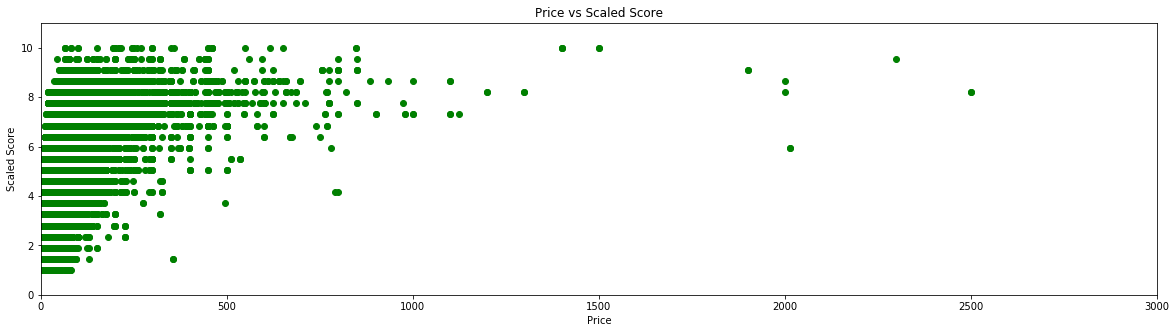

In [6]:
plt.figure(figsize=(20,5))
plt.scatter(df['price'], df['scaled_score'], color = "green")
plt.title("Price vs Scaled Score")
plt.ylim(0, 11)
plt.xlim(0, 3000)
plt.xlabel("Price")
plt.ylabel("Scaled Score")
plt.show()

Generally, the trend of the graph, is the higher the price the better the score. However, once the wine prices get very high, past $1000, the trend is not apparent anymore and is more randomn. This is quite inconsistent with our hypothesis at first look. 

In [7]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.price, df.scaled_score)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.437


The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score. A score between 0.5 - 1 indicates a strong correlation so we can see, by the score we have, the two variables don't correlate strongly to each other, keeping in line with our hypothesis that a higher price doesnt always translate to a higher wine enthuist score. 

# Data Analysis & Results

## EDA: Exploratory Data Analysis

Before we began our data analysis, we were able to recognize a few details about our dataset. Right off the bat, we could see that our dataset loosely followed an inverse exponential distribution, with a sharp increase in prices as the score increased. As seen by the preview scatter plot included above, we can see that this data set has clear outliers outside of its distribution. For example, one of the highest prices, above `$3000`, occurs near the center of the graph, much above its expected value of `$500`. Besides these outliers, we think our data has a distinct and obvious relationship: as score increases, so does the price. 

### Structure

Our datasets were both in .csv format, with each observation already in a separate row. After extensive data cleaning and standardization, we have information about wines' country, score, price, province, variety, winery, review source, and scaled score - each in their own column. We can see that each of these columns is important for important data analysis, with the most important being price and scaled score, as they will directly assist in proving/disproving our hypothesis. The dataset was spread across two tables - one with unknown source origin, and one from Twitter. As a part of our data cleaning, we joined both datasets into one, df, and made sure all the columns aligned. We also added in a new column which identified whether the review was from Twitter or not (referred to as 'review source' above).

### Granularity

Each row of our dataset has individual level granularity, as each entry represents its own signature wine bottle. Individual level granularity is consistent throughout our dataset, as every single row represents no more and no less than one signature bottle of wine. Although the data has not been grouped yet, we expect to do a lot of grouping during our Data Visualization section. We will group the data by country, by variety, and most importantly, by price range. We plan to create graphs that holistically analyze and help draw conclusions about the data with these groupings.

### Scope, Temporality, and Faithfulness

The scope of this dataset may be limited when considering how well it represents every single wine ever created. Not only is the original dataset from a magazine which reviews the top rated wines, it also crops out any entries whose score is below an 80 out of 100. While this will still help us analyze a range of scores and their relation to wine price, we believe the dataset fails to represent the world's wine population fully. The temporality of this dataset should not be an issue, as it was created quite recently, in 2018, and should still accurately represent the status quo. The faithfulness of this data is definitely robust, as all the reviews come from an unbiased and prestigious magazine that is devoted to the study of wine.

## Data Visualization

In the following cells, we decided to visualize the data by catagorizing it. Using bar graphs, we identified several relationships that we can use to generate these graphs. While building the graph we decided that it would be best to sort it in ascending or descending order, so that we can easily identify which categories have the higher or lower values.

### Compile data and prepare for visualization

In [8]:
countries = df.country.unique()
countries_mean_scores = df.groupby('country')['scaled_score'].mean()
countries_mean_price = df.groupby('country')['price'].mean()
countries_data = pd.concat([countries_mean_scores, countries_mean_price], axis = 1, join='inner')
countries_data = countries_data.reset_index()

#### Average Scaled Score By Country

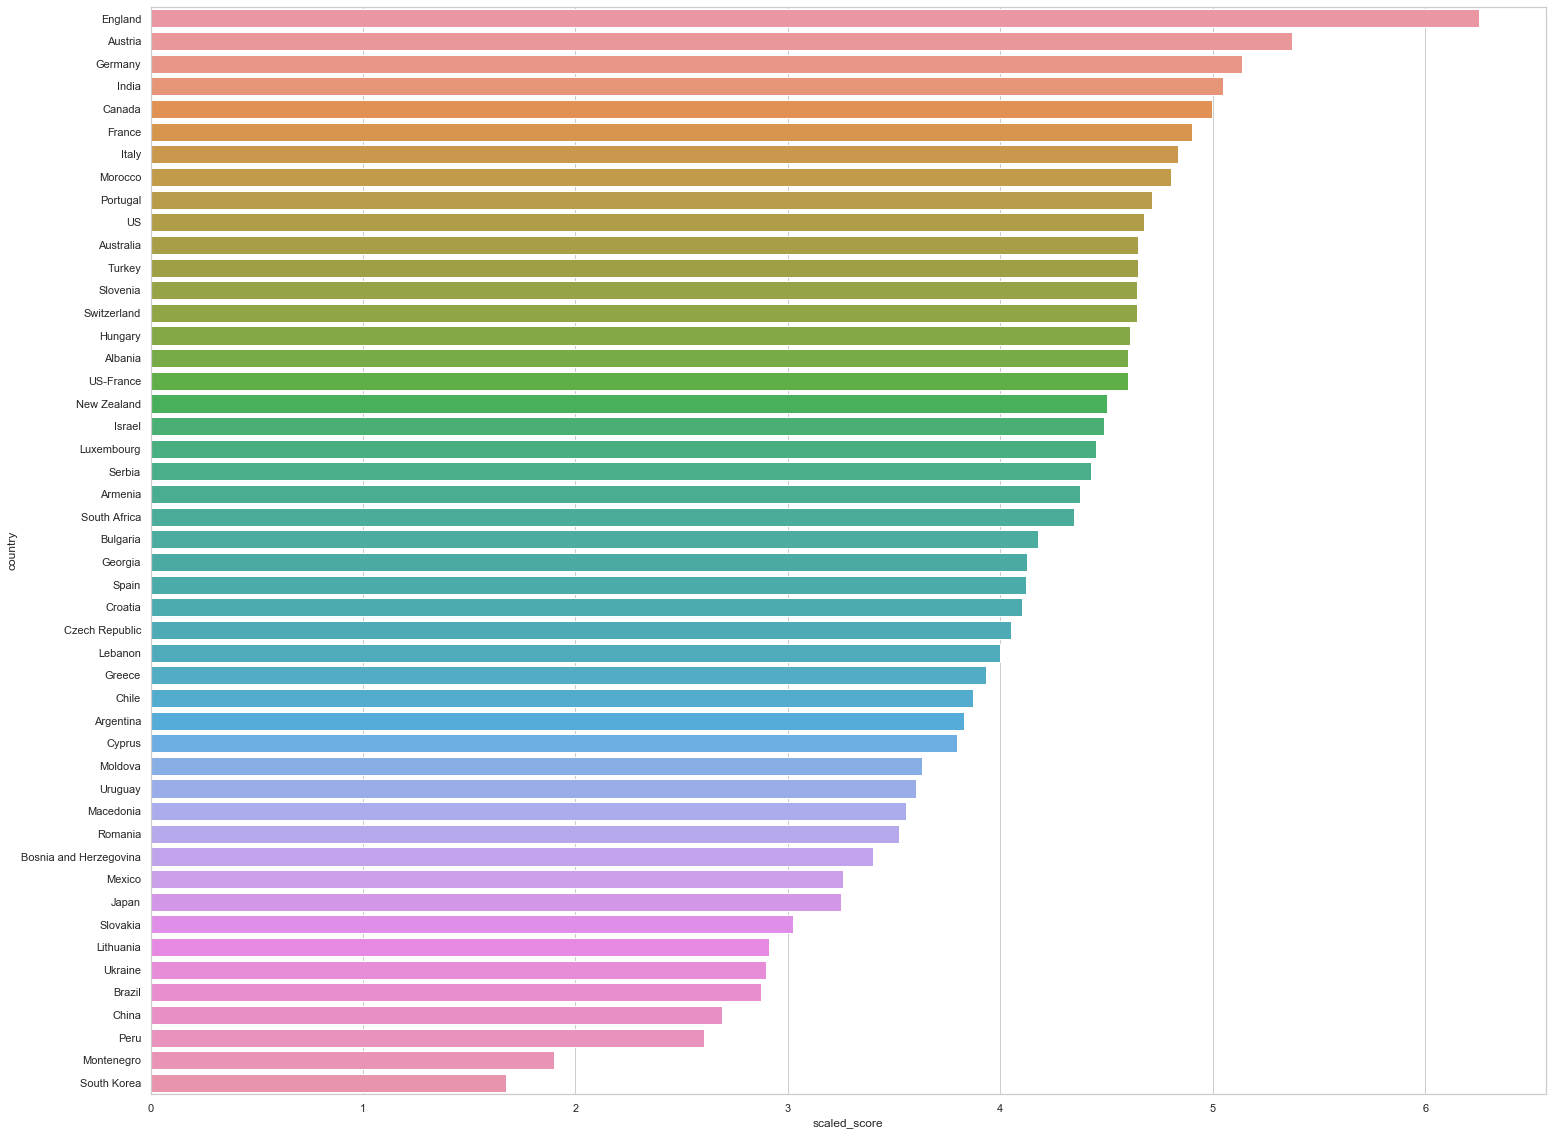

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))
countries_data = countries_data.sort_values(by = 'scaled_score', ascending=False)
sns.barplot(x="scaled_score", y='country', data=countries_data, ci="sd")

This graph has taken the average score that each wine got according to the country that it was manufactured in. We can see that there is a wide distribution of prices. Countries from Europe are predominantly present in near the top of the graph, however countries like India, Morocco, Canada and the US are also present in the top 10.

#### Average Price per Bottle by Country

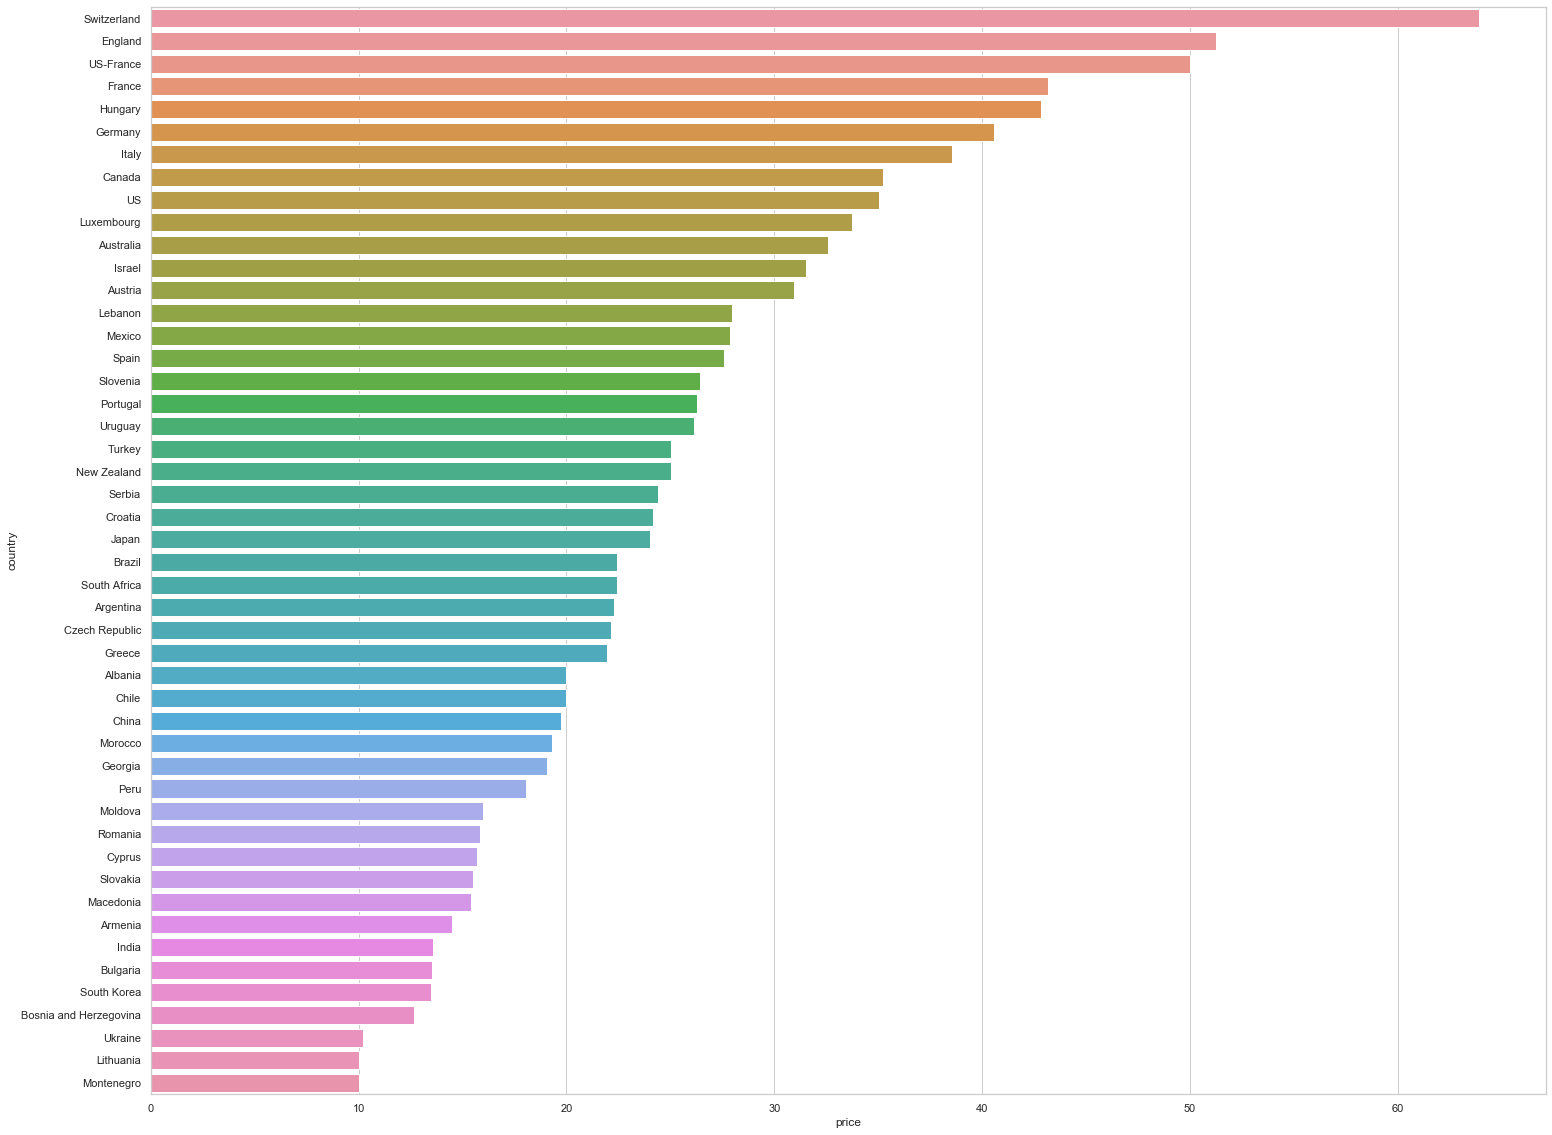

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))
countries_data = countries_data.sort_values(by = 'price', ascending=False)
sns.barplot(x="price", y='country', data=countries_data, ci="sd")

This figure displays the average price per bottle and has grouped the wine by country. This shows us how staggeringly different the prices of the wines from different countries in the world are. The average price in a country like India is around 13 dollars per bottle, which puts it in sixth ranking when sorted from lowest price to highest. On the other hand, Switzerland has the highest average price with a average of over 60 dollars per bottle.

#### Price per one review unit (from scaled score) by Country

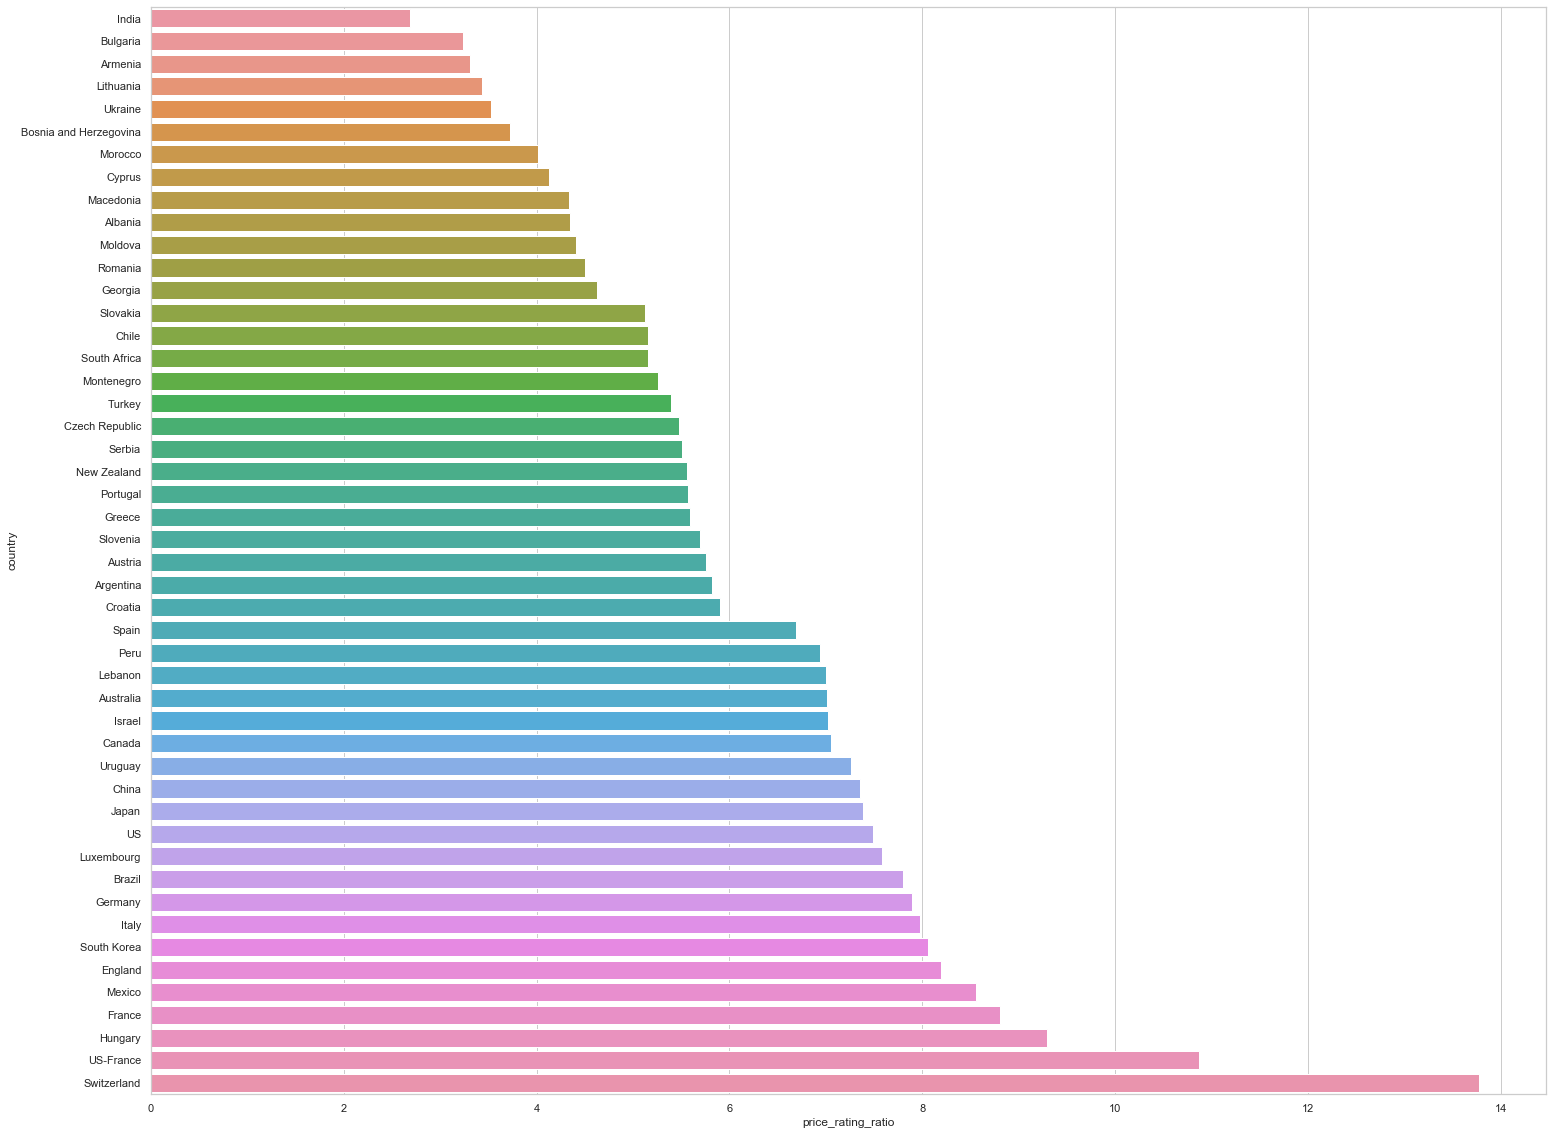

In [11]:
countries_data['price_rating_ratio'] = countries_data.price / countries_data.scaled_score
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))
countries_data = countries_data.sort_values(by = 'price_rating_ratio', ascending=True)
sns.barplot(x="price_rating_ratio", y='country', data=countries_data, ci="sd")

By using the two graphs before this one, we can generate a relationship between price per bottle and the bottle's scaled score in a review. By dividing a country's average price per bottle by it's scaled score, a ratio is generated that shows the average dollar amount it costs per 1 unit of the wine's scaled score. For example, this graph shows that the average bottle of wine from Switzerland has a cost of almost 14 dollars per 1 unit of its review's scaled score. That is almost four times that of the ratio of a bottle made in India.

####  Mean Scaled Score by Different Varieties

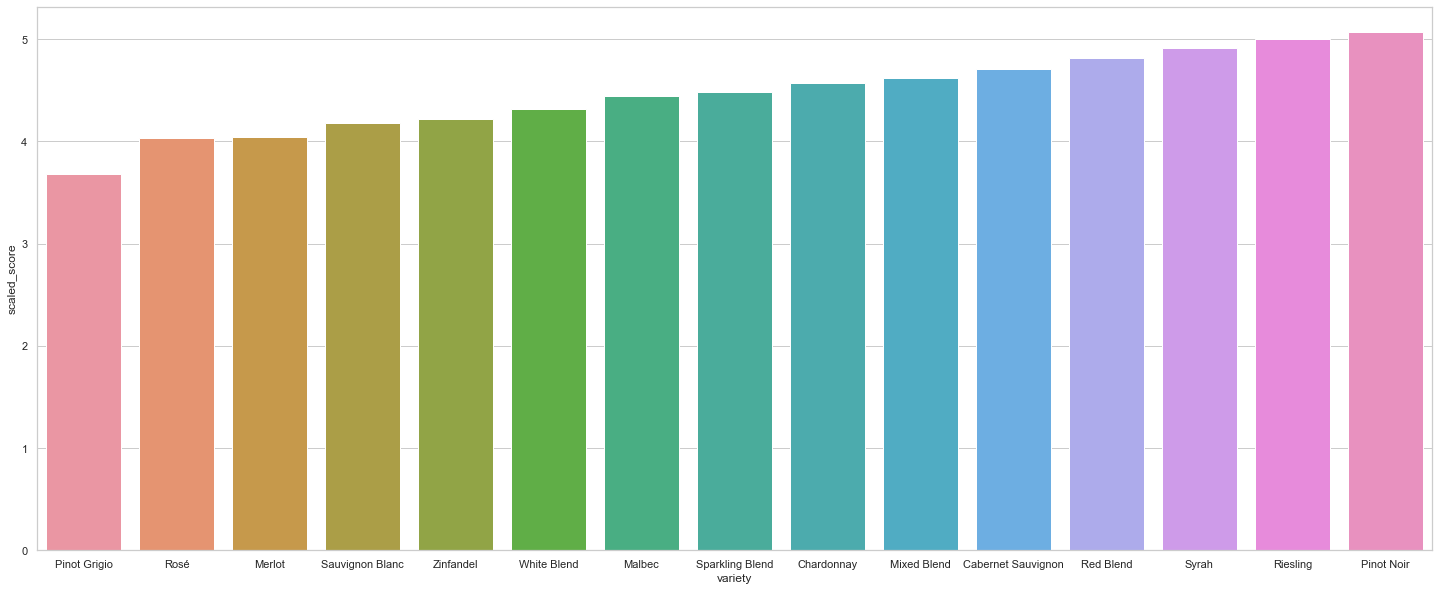

In [12]:
plt.figure(figsize=(25,10))
varietyscore_mean = df.groupby('variety')['scaled_score'].mean().sort_values(ascending=True)
varietyscore_mean = varietyscore_mean.reset_index()
sns.barplot(x="variety", y="scaled_score", data=varietyscore_mean)  # RUN PLOT 

This figure is very similar to the figure which shows the relationship between a countries average score for a wine and its scaled score. Here we catagorized the wine by its variety and sorted them to show the average score each variety got.

#### Price by Different Varieties

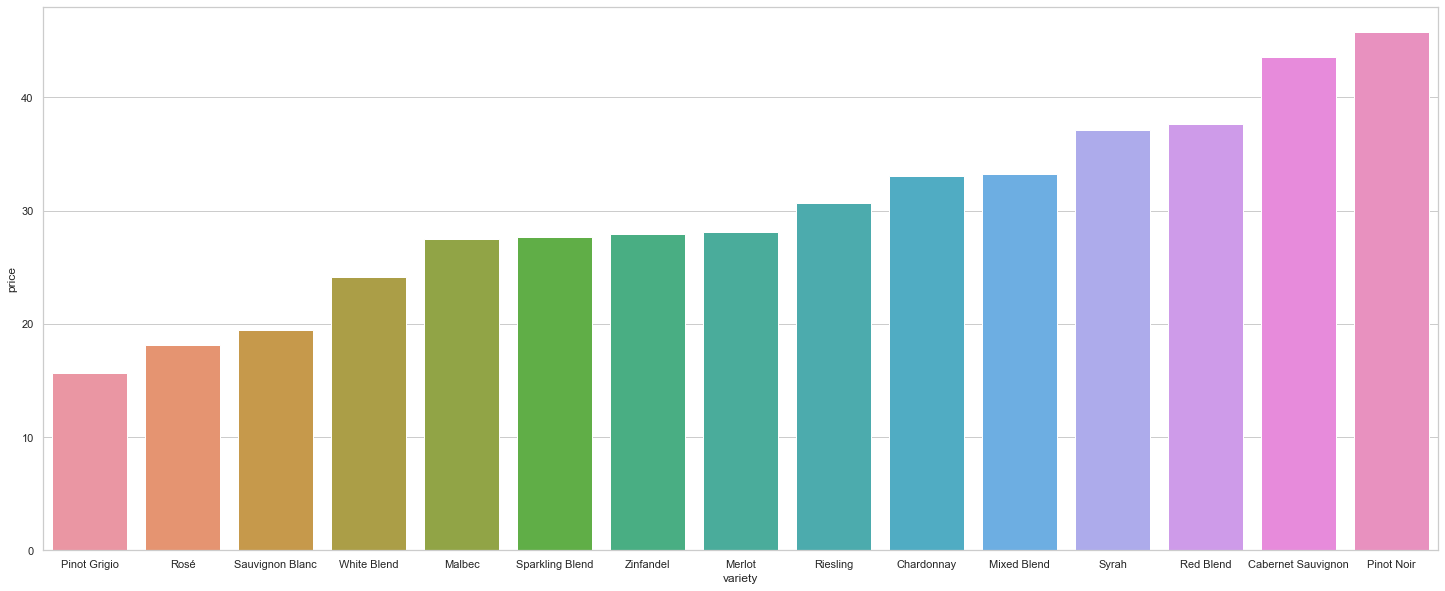

In [13]:
plt.figure(figsize=(25,10))
variety_mean = df.groupby('variety')['price'].mean().sort_values(ascending=True)
variety_mean = variety_mean.reset_index()
sns.barplot(x="variety", y="price", data=variety_mean)  # RUN PLOT 

In this graph we showed the relationship between the varieties of wine and their average prices. This is also similar to the comparison we did for the countries. We will use these two relationships for the wine variety to build our machine learning model.

### Discerning Accuracy of Hypothesis

In this section, we will attempt to accurately plot the relationship between wine price and WineEnthusiast score. To do this, we will have to categorize prices into roughly 10 categories, and then create boxplots of each price range.

#### More Data Cleaning

In [14]:
prices = df.drop(['variety', 'country', 'score', 'winery', 'from Twitter?', 'province'], axis = 1)

#### Categorize the Prices

Here we thought the best way to test our hypothesis was to split the wines by price, generating 10 price ranges. We will use the price ranges and the scores for the wines in those price ranges to analyze that relationship between a wine's price label and its review score.

In [15]:
over100 = prices.loc[prices['price'] >= 100]
under100 = prices.loc[prices['price'] < 100]
under80 = prices.loc[prices['price'] < 80]
under70 = prices.loc[prices['price'] < 70]
under60 = prices.loc[prices['price'] < 60]
under50 = prices.loc[prices['price'] < 50]
under40 = prices.loc[prices['price'] < 40]
under30 = prices.loc[prices['price'] < 30]
under20 = prices.loc[prices['price'] < 20]



p80to100 = under100.loc[under100['price'] >= 80]
p70to80 = under80.loc[under80['price'] >= 70]
p60to70 = under70.loc[under70['price'] >= 60]
p50to60 = under60.loc[under60['price'] >= 50]
p40to50 = under50.loc[under50['price'] >= 40]
p30to40 = under40.loc[under40['price'] >= 30]
p20to30 = under30.loc[under30['price'] >= 20]
p10to20 = under20.loc[under20['price'] >= 10]
p0to10 = prices.loc[prices['price'] < 10]

over100 = over100.assign(price_range='>=100')
p80to100 = p80to100.assign(price_range='[80,100)')
p70to80 = p70to80.assign(price_range='[70,80)')
p60to70 = p60to70.assign(price_range='[60,70)')
p50to60 = p50to60.assign(price_range='[50,60)')
p40to50 = p40to50.assign(price_range='[40,50)')
p30to40 = p30to40.assign(price_range='[30,40)')
p20to30 = p20to30.assign(price_range='[20,30)')
p10to20 = p10to20.assign(price_range='[10,20)')
p0to10 = p0to10.assign(price_range='<10')

ranges = [p0to10, p10to20, p20to30, p30to40, p40to50, p50to60, p60to70, p70to80, p80to100, over100]
prices_with_ranges = pd.concat(ranges)
prices_with_ranges

,price,scaled_score,price_range
119,7.0,3.70,<10
247,9.0,4.60,<10
726,9.0,3.25,<10
730,9.0,3.25,<10
748,9.0,3.25,<10
...,...,...,...
280741,100.0,5.05,>=100
280748,115.0,5.05,>=100
280821,100.0,5.95,>=100
280849,105.0,5.95,>=100


#### Plot the Trend: WineEnthusiast Scaled Score by Price

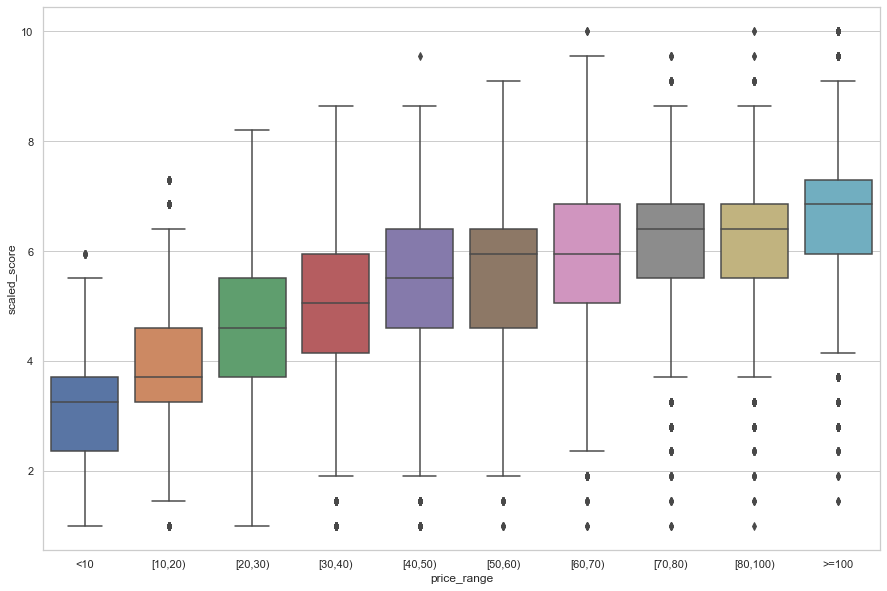

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="price_range", y="scaled_score", data=prices_with_ranges)

This box plot shows that there is a trend that shows that a higher priced wine will generate a higher score from the taster in the review. It contradicts our hypothesis, which was that there would be no discernible relationship between a wine's price and its review score.

## Regression Models

In [17]:
#this will be the primary dataframe used for both models 
dataset = df[['price','variety','scaled_score']]
dataset

,price,variety,scaled_score
0,235.0,Cabernet Sauvignon,8.20
1,110.0,Mixed Blend,8.20
2,90.0,Sauvignon Blanc,8.20
3,65.0,Pinot Noir,8.20
4,66.0,Red Blend,7.75
...,...,...,...
280896,28.0,Riesling,5.50
280897,75.0,Pinot Noir,5.50
280898,30.0,Mixed Blend,5.50
280899,32.0,Mixed Blend,5.50


### Simple Linear Regression Model
Even though there isn't a strong correlation between the price of the wine and the score, The model will attempt to use price to determine the scaled score of the wine. Includes user interface where user can type in price of wine, and program returns the possible score of the wine out of ten, rounded to the nearest whole number.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#setting independant variable to values in price column
x = dataset.iloc[:, :1].values
#setting dependant variable to values in scaled_score column
y = dataset.iloc[:, 2].values

In [19]:
#Splitting testing and training set, 30-70
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [20]:
#Creating instance of Linear Regression
linreg = LinearRegression()

In [21]:
#fitting training sets
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#testing model
y_pred = linreg.predict(x_test)

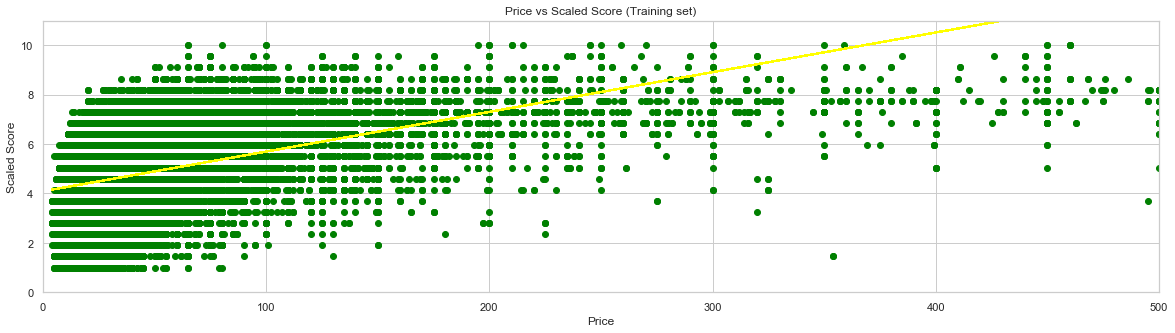

In [23]:
plt.figure(figsize=(20,5))
plt.scatter(x_train, y_train, color = "green")
plt.plot(x_train, linreg.predict(x_train), color = "yellow")
plt.title("Price vs Scaled Score (Training set)")
plt.ylim(0, 11)
plt.xlim(0, 500)
plt.xlabel("Price")
plt.ylabel("Scaled Score")
plt.show()

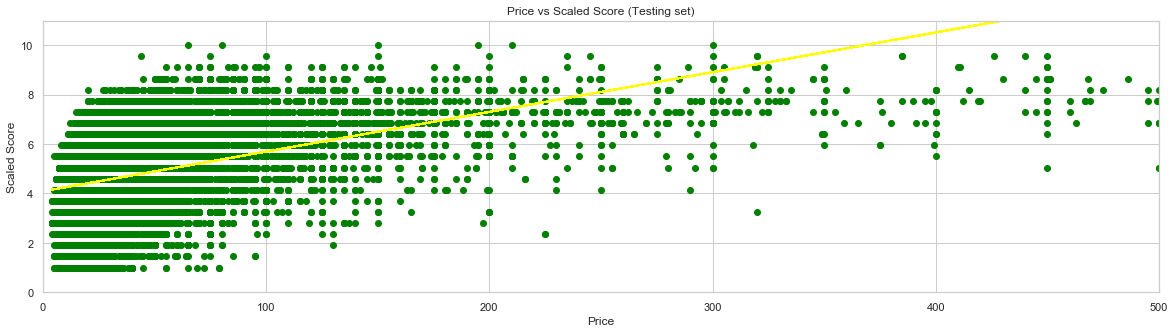

In [24]:
plt.figure(figsize=(20,5))
plt.scatter(x_test, y_test, color = "green")
plt.plot(x_train, linreg.predict(x_train), color = "yellow")
plt.title("Price vs Scaled Score (Testing set)")
plt.ylim(0, 11)
plt.xlim(0, 500)
plt.xlabel("Price")
plt.ylabel("Scaled Score")
plt.show()

As seen in the graph above, up until the price of 300, the the line of regression follows the general trend of the scatterplot, after $300, the scores level off, as the maximum they can be is 10. While this further confirms our team's hypothesis, a third variable may need to be introduced to create more of a linear trend with more of a correlation.

In [25]:
#sample prediction
linreg.predict([[21]])

array([4.42701121])

In [26]:
linreg.score(x,y)

0.19138789675042578

In [27]:
#Metrics to evaluate model
from sklearn.metrics import r2_score,mean_squared_error
print('R2 score: %.2f' % r2_score(y_test,y_pred)) 
print('Mean squared Error :',mean_squared_error(y_test,y_pred))

R2 score: 0.19
Mean squared Error : 1.6273376575307266


In [28]:
price = float(input('Enter Wine Price : $'))
score = linreg.predict([[price]])

#sets score boundaries from 0-10
if score>10:
    score = 10
elif score<0 or price<=0:
    score = 0

#outputs predicted score
print('This Wine scores about a(n)', str(round(float(score), 2)),'out of 10.0')

Enter Wine Price : $55
This Wine scores about a(n) 4.97 out of 10.0


### Multiple Linear Regression Model
Due to the inaccuracy of the simple linear model that only has one independant variable, this model uses price and variety to determine scaled score of the wine. Compared to the simple linear regression, it seems to account for the variance in the data better than the simple linear model as shown by the higher R2 score. Also has a lower mean squared error and higher model score overall.

In [29]:
#setting independant variable to values in price and variety columns
X = dataset.iloc[:, :-1].values
#setting dependant variable to values in scaled_score column
y = dataset.iloc[:, 2].values

In [30]:
#One-hot encoding to account for the categorical independant variable "variety"
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()

In [31]:
X = X[:, 1:]

In [32]:
from sklearn.model_selection import train_test_split
#Splitting testing and training set, 25-75
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.linear_model import LinearRegression
#Creating instance of Linear Regression and fitting the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#testing model
y_pred = regressor.predict(X_test)

In [35]:
regressor.score(X,y)

-1.011115619814449e+19

In [36]:
#Metrics to evaluate model
from sklearn.metrics import r2_score,mean_squared_error
print('R2 score: %.2f' % r2_score(y_test,y_pred))
print('Mean squared Error :',mean_squared_error(y_test,y_pred))

R2 score: -40517458456177852416.00
Mean squared Error : 8.157200746394855e+19


# Ethics & Privacy

Ethical concerns that were raised was the type of data that we were going to use. We made sure to use data from the database known as Kaggle because it consists of data that is open to the public. We did not have to worry about getting access to restricted or protected data, so this made it easy to see everything we needed to know for analysis. As for privacy reasons we made sure to keep taster’s names, names of people giving their score for each wine, out of the dataset. Things such as twitter names and anything that can trace back to an individual was also kept anonymous. The current column “from Twitter?” was changed from taster’s twitter handles to if tasters had a twitter or not. Instead of showing a twitter handle, we changed it to show True if the review came from Twitter and False if it did not. Throughout the entirety of the project we followed the safe harbor requirements to ensure privacy.

Since our group did not have any wine connoisseurs, there was not much of a bias when working with the data. Although, the only bias was us choosing a data set that focused specifically on scores put out by sommeliers. Others who drink occasionally were not included in this data set. This allowed us to focus only on this population rather than splitting up people of the data set into smaller groups: one of experienced reviewers, one of often drinkers, and one of occasional drinkers.

With all this taken care of, we believe that there are no ethical/privacy issues present in our project.

# Conclusion & Discussion

Our goal in this project was to use WineEnthusiast datasets to learn more about trends in the highly profitable wine business. Our main goal was to analyze whether there was a relationship between wine prices and their WineEnthusiast scores. After immense data cleaning and data standardization, we were able to get data on the 15 main types of wine, introduce a new and comprehensible scoring metric, and study wines from 48 different countries. The graphs shown in the data analysis section help visualize how diverse our dataset was. In addition to learning about different scores and prices, we were able to gain valuable knowledge about which countries scored highest, charged the most, and had the most efficient price per review unit ratio. After acquiring this information, we were able to build a machine learning model that predicts the score of wine based on its price. We discovered that there was a clear trend between the price and scaled score of the 250,000+ wines in our dataset, decisively proving our hypothesis wrong. 

Even though our hypothesis was proved wrong pretty conclusively by this dataset, there are a few issues that could be addressed to get an even more accurate analysis in the future. Firstly, the dataset only contained wines who had scored higher than an 80 out of 100 on the WineEnthusiast score. Because of this, we were unable to account for lower rated wines in our analysis, and were left with an analysis on the creme of the crop. Also, there was a lot of variability in wine variety, as we originally encountered hundreds of varieties of wine. Narrowing them down into the 15 main types of wine helped us clean the data but may have led to some loss in accuracy of results. Finally, we would like to implement a more detailed machine learning model one day, after acquiring a more holistic dataset. We also suspect that an exponential regression model may result in even more accurate results. All in all, being able to create an accurate model that can predict score based on variety as well as price would be amazing, but unfortunately could not be implemented with this specific dataset.

# Team Contributions

#### Yukti Vijay - Data Cleaning, ML Regression Models
#### Sumanth Billa - Data Visualization, Ethics/Privacy, Hypothesis
#### Aditya Mehta - Data Cleaning, EDA, Data Viz, Conclusion/Discussion
#### Chinmay Joshi - Background, Data Analysis, and Data Visualization